In [12]:
from torch.utils.data import DataLoader,Dataset
import torch
import pickle
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import PIL.Image

# 取用資料的框架

In [11]:
class CDataset(Dataset):
    def __init__(self,data_dir):
        '''
        大概有兩種用法
        1.把所有要用的資料一次性的都存進來
        2.當資料太大，會塞爆記憶體的時候，可以定義文件的索引就好，在真的要用資料的時候才根據索引讀取資料
            2.比起1. 較慢
        '''
        self.data_dir = data_dir
        self.meda_data = 'batches.meta'
        self.bath_train_list = ['data_batch_'+str(i) for i in range(1,6,1)]
        self.bath_test = 'test_batch'

    def __getitem__(self,bat,idx):
        path = os.path.join(
            self.data_dir,
            self.bath_train_list[bat]
        )
        
        data = self.unpickle(path)
        
        img = np.transpose(np.reshape(data[b'data'][idx],(3, 32,32)), (1,2,0))
        
        # data prepare
        img_tensor = torch.from_numpy(img)
        label = data[b'labels'][idx]
        label_name = data[b'filenames'][idx]
        
        return {label,label_name,img_tensor}
    
    def __len__(self):
    # 需要返回資料的長度，取資料的時候才知道要找哪個
    
        pass
    
    # 一些可能會用到的工具
    @staticmethod
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

## peek a little image data

In [13]:
data = CDataset.unpickle(r'/Users/leoliu/Documents/AI_study/DATA/cifar-10-batches-py/data_batch_1')

In [15]:
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

其中一張圖片的名字和圖像，一隻小青蛙

b'leptodactylus_pentadactylus_s_000004.png'
(3072,)


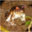

In [4]:
print(data[b'filenames'][0])
print(data[b'data'][0].shape) #3072 = 32*32*3)
# img = np.reshape(data[b'data'][0], (32,32,3), order='F') # Fortran-like indexing order
img = np.transpose(np.reshape(data[b'data'][0],(3, 32,32)), (1,2,0))
PIL.Image.fromarray(img)
# plt.imshow(img)

## access data

In [9]:
data_dir = r'DATA/cifar-10-batches-py/data_batch_3'
cifar = CDataset(data_dir)

In [10]:
cifar.bath_list

['data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5']

# CNN frame